In [4]:
#downloading libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter
import pickle
import matplotlib.dates
import datetime
from datetime import datetime
import altair as alt
#nltk.download()

In [5]:
data=pd.read_csv('reddit-india-data.csv')
data

,flair,title,score,id,url,comms_num,body,author,comments,timestamp
0,AMA,I'm a Malayalee ABCD. Ask Me Anything.,1,cz98so,https://www.reddit.com/r/india/comments/cz98so...,42,I'm a Malayalee ABCD (American-Born Confused D...,simsim1000,Did you ever faced racism? \n\nAnd how is gir...,2019-09-04 08:34:35
1,AMA,What are some of the memorable posts of r/India??,85,cfj0kx,https://www.reddit.com/r/india/comments/cfj0kx...,67,As title suggests. Some posts are legends in R...,xxyyccb,Can't find it but some guy's mother posted he...,2019-07-20 20:37:58
2,AMA,Requesting AMA by Residents of Jammu & Kashmir.,4,crofzs,https://www.reddit.com/r/india/comments/crofzs...,18,"If there is any Residents of Jammu & Kashmir, ...",namanjha29,"On here, the accounts claiming to be Kashmir ...",2019-08-18 06:06:03
3,AMA,"Friends, Indians, countrymen, I cleared UPSC C...",1859,ba1o59,https://www.reddit.com/r/india/comments/ba1o59...,404,I am also super happy as I got the rank which ...,pseudoliberandu,Congrats. My neighbour aunty wants to know ab...,2019-04-06 20:14:18
4,AMA,So this happened yesterday [R],609,bcz7em,https://imgur.com/DJXElBz,77,NaN,High24x7,the fact that they are acknowledging the prob...,2019-04-14 17:57:08
...,...,...,...,...,...,...,...,...,...,...
1013,[R]eddiquette,From where will Congress get 90 seats??? [r],5,1zw01h,https://www.reddit.com/r/india/comments/1zw01h...,9,This CNN-IBN poll tracker gives Congress alone...,panditji_reloaded,My guess is as given below:\n\n*\tANDHRA PRAD...,2014-03-09 02:42:20
1014,[R]eddiquette,"‘Even if everyone is immoral, there are ways o...",0,20r4jc,http://indianexpress.com/article/opinion/colum...,2,NaN,gkachru,There are blow-by-blow responses to his conje...,2014-03-19 11:01:15
1015,[R]eddiquette,Amit Shah accused of illegal snooping of woman...,1,1qp4vz,http://www.indianexpress.com/news/amit-shah-ac...,2,NaN,tattvaanveshana,Getting desperate?\n\n>Hours after the tape w...,2013-11-16 05:42:54
1016,[R]eddiquette,High Drama in RS Over Introduction of Bill on ...,5,1t65wv,https://www.reddit.com/r/india/comments/1t65wv...,6,http://news.outlookindia.com/items.aspx?artid=...,iVarun,Can you produce any text of the bill?[At leas...,2013-12-19 04:38:27


In [6]:
def data_getter(data,f,to_get):
    flair_data=[]
    for i in range(len(data)):
        if data['flair'][i] ==f:
            flair_data.append(data[to_get][i])
    return(flair_data)
def date_spec(data,f):
    flair_data=[]
    for i in range(len(data)):
        if data['flair'][i] ==f:
            datetime_object = datetime.strptime(data['timestamp'][i], '%Y-%m-%d %H:%M:%S')
            dates = matplotlib.dates.date2num( datetime_object)
            flair_data.append(dates)
    return(flair_data)
        

In [7]:
ama_comms=data_getter(data,'AMA','comms_num')
ask_comms=data_getter(data,'AskIndia','comms_num')
bus_comms=data_getter(data,'Business/Finance','comms_num')
food_comms=data_getter(data,'Food','comms_num')
npol_comms=data_getter(data,'Non-Political','comms_num')
photo_comms=data_getter(data,'Photography','comms_num')
policy_comms=data_getter(data,'Policy/Economy','comms_num')
pol_comms=data_getter(data,'Politics','comms_num')
sc_comms=data_getter(data,'Science/Technology','comms_num')
sports_comms=data_getter(data,'Sports','comms_num')
red_comms=data_getter(data,'[R]eddiquette','comms_num')

In [8]:
ama_score=data_getter(data,'AMA','score')
ask_score=data_getter(data,'AskIndia','score')
bus_score=data_getter(data,'Business/Finance','score')
food_score=data_getter(data,'Food','comms_num')
npol_score=data_getter(data,'Non-Political','score')
photo_score=data_getter(data,'Photography','score')
policy_score=data_getter(data,'Policy/Economy','score')
pol_score=data_getter(data,'Politics','score')
sc_score=data_getter(data,'Science/Technology','score')
sports_score=data_getter(data,'Sports','score')
red_score=data_getter(data,'[R]eddiquette','score')

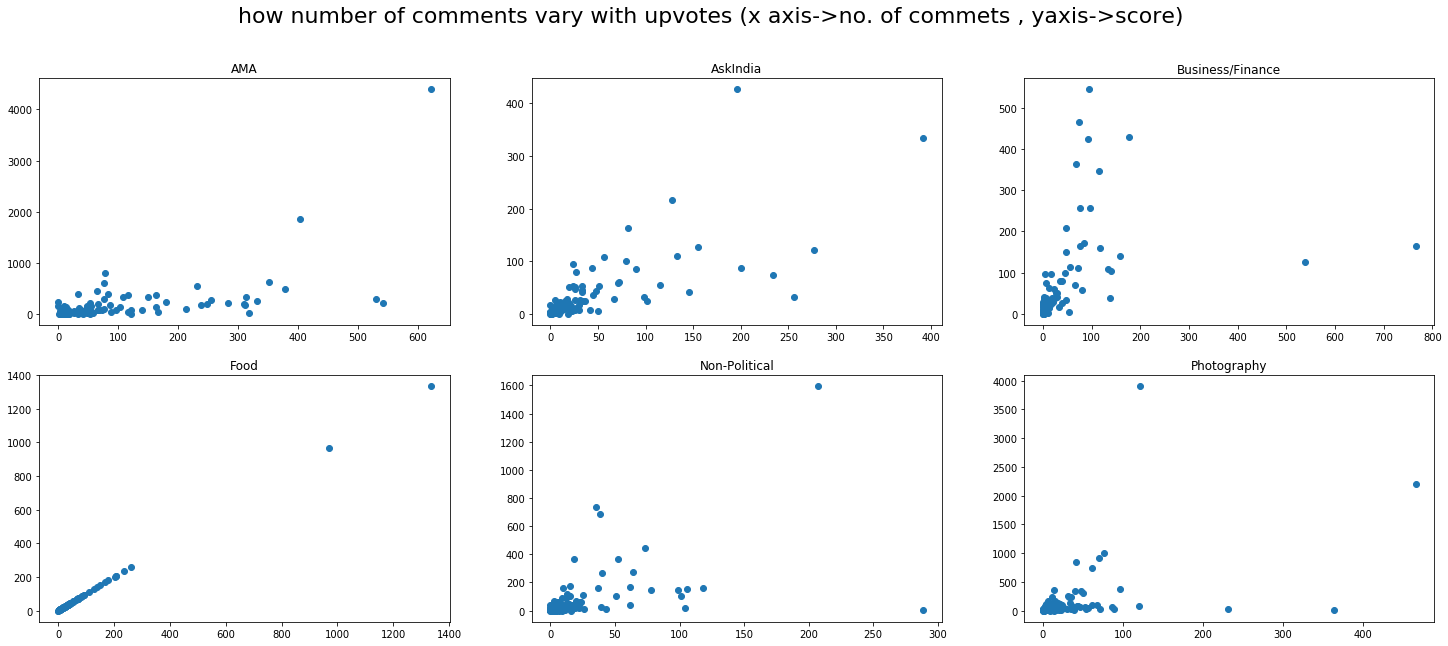

In [14]:
fig1=plt.figure(figsize=(25,10))
fig1.suptitle('how number of comments vary with upvotes (x axis->no. of commets , yaxis->score) ', fontsize =22)
p1=fig1.add_subplot(231)
p1.set_title('AMA')
p1.scatter(ama_comms,ama_score)

p2=fig1.add_subplot(232)
p2.set_title('AskIndia')
p2.scatter(ask_comms,ask_score)

p3=fig1.add_subplot(233)
p3.set_title('Business/Finance')
p3.scatter(bus_comms,bus_score)

p4=fig1.add_subplot(234)
p4.set_title('Food')
p4.scatter(food_comms,food_score)

p5=fig1.add_subplot(235)
p5.set_title('Non-Political')
p5.scatter(npol_comms,npol_score)

p6=fig1.add_subplot(236)
p6.set_title('Photography')
p6.scatter(photo_comms,photo_score)

fig1.savefig('comm_vs_posts.png')

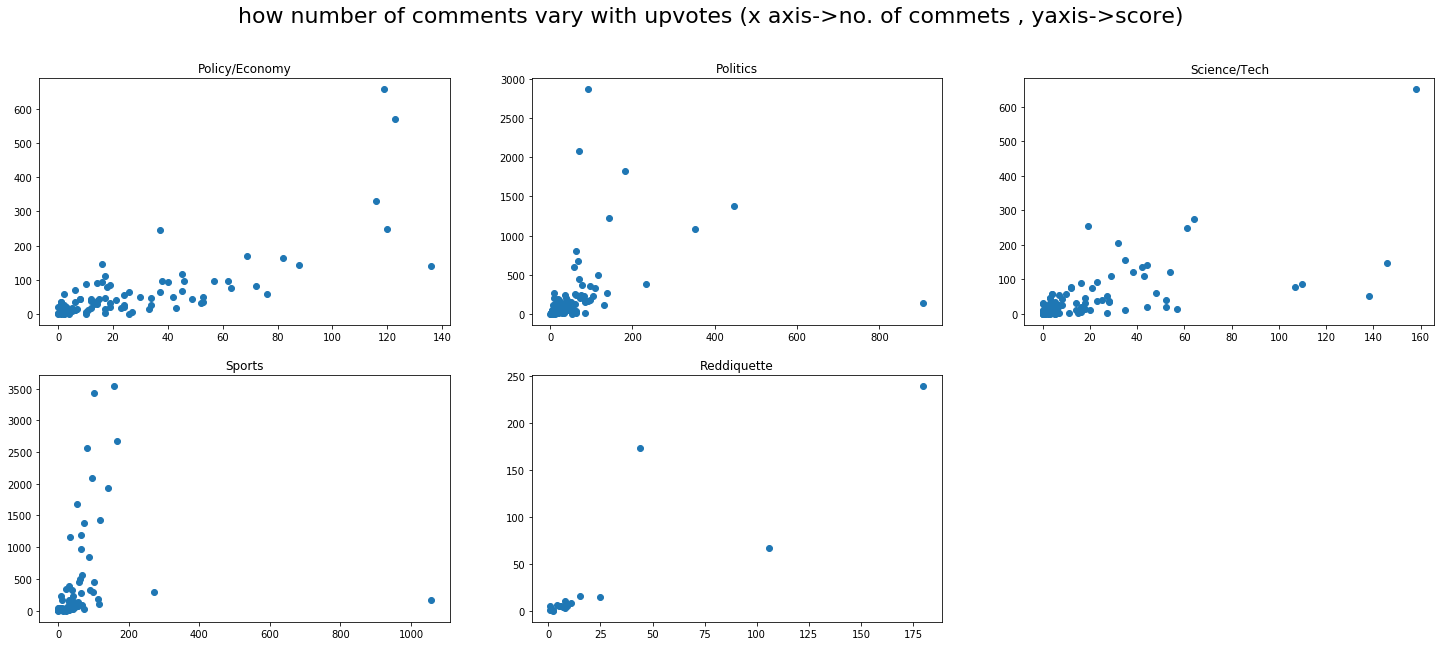

In [113]:
fig2=plt.figure(figsize=(25,10))
fig2.suptitle('how number of comments vary with upvotes (x axis->no. of commets , yaxis->score) ', fontsize =22)
p7=fig2.add_subplot(231)
p7.set_title('Policy/Economy')
p7.scatter(policy_comms,policy_score)

p8=fig2.add_subplot(232)
p8.set_title('Politics')
p8.scatter(pol_comms,pol_score)

p9=fig2.add_subplot(233)
p9.set_title('Science/Tech')
p9.scatter(sc_comms,sc_score)

p10=fig2.add_subplot(234)
p10.set_title('Sports')
p10.scatter(sports_comms,sports_score)

p11=fig2.add_subplot(235)
p11.set_title('Reddiquette')
p11.scatter(red_comms,red_score)


fig2.savefig('comm_vs_score.png')

In [15]:
ama_date=date_spec(data,'AMA')
ask_date=date_spec(data,'AskIndia')
bus_date=date_spec(data,'Business/Finance')
food_date=date_spec(data,'Food')
npol_date=date_spec(data,'Non-Political')
photo_date=date_spec(data,'Photography')
policy_date=date_spec(data,'Policy/Economy')
pol_date=date_spec(data,'Politics')
sc_date=date_spec(data,'Science/Technology')
sports_date=date_spec(data,'Sports')
red_date=date_spec(data,'[R]eddiquette')

/Users/jay.0tist/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


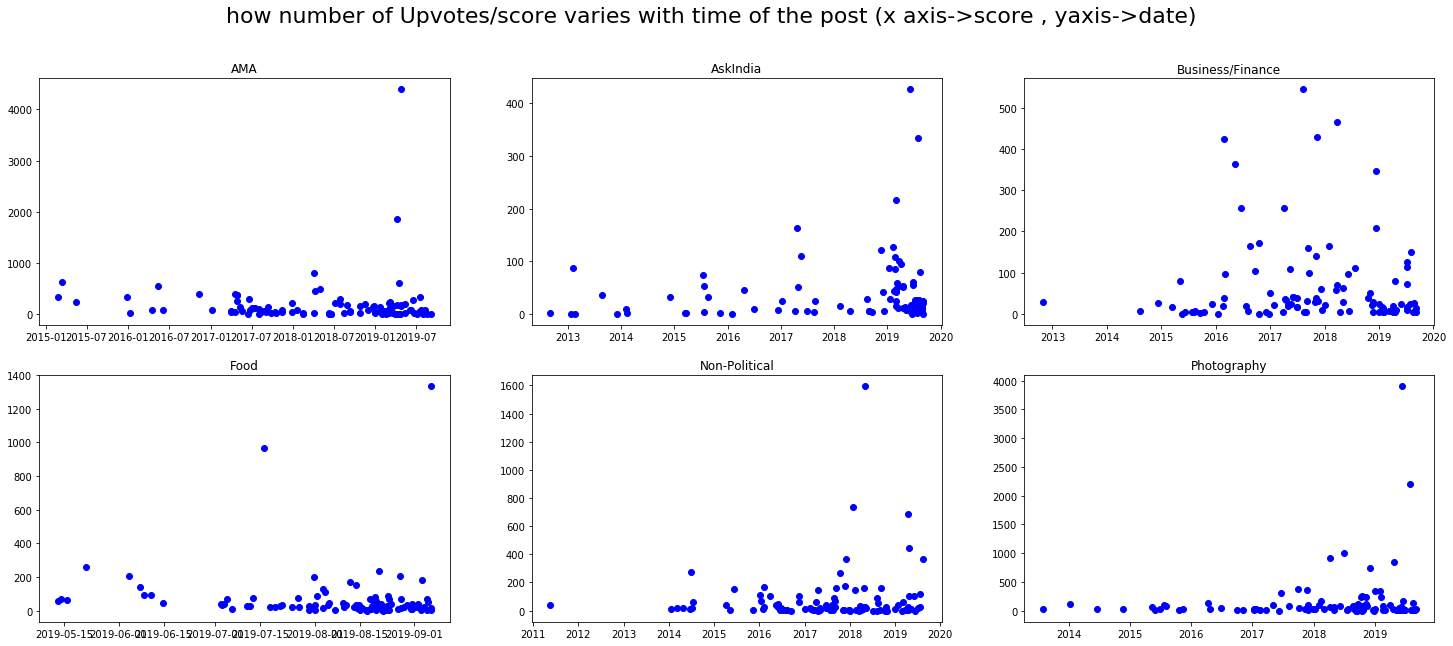

In [11]:
fig1=plt.figure(figsize=(25,10))
fig1.suptitle('how number of Upvotes/score varies with time of the post (x axis->score , yaxis->date) ', fontsize =22)
p1=fig1.add_subplot(231)
p1.set_title('AMA')
p1.plot_date(ama_date,ama_score,'bo')

p2=fig1.add_subplot(232)
p2.set_title('AskIndia')
p2.plot_date(ask_date,ask_score,'bo')

p3=fig1.add_subplot(233)
p3.set_title('Business/Finance')
p3.plot_date(bus_date,bus_score,'bo')

p4=fig1.add_subplot(234)
p4.set_title('Food')
p4.plot_date(food_date,food_score,'bo')

p5=fig1.add_subplot(235)
p5.set_title('Non-Political')
p5.plot_date(npol_date,npol_score,'bo')

p6=fig1.add_subplot(236)
p6.set_title('Photography')
p6.plot_date(photo_date,photo_score,'bo')

fig1.savefig('score_vs_date.png')

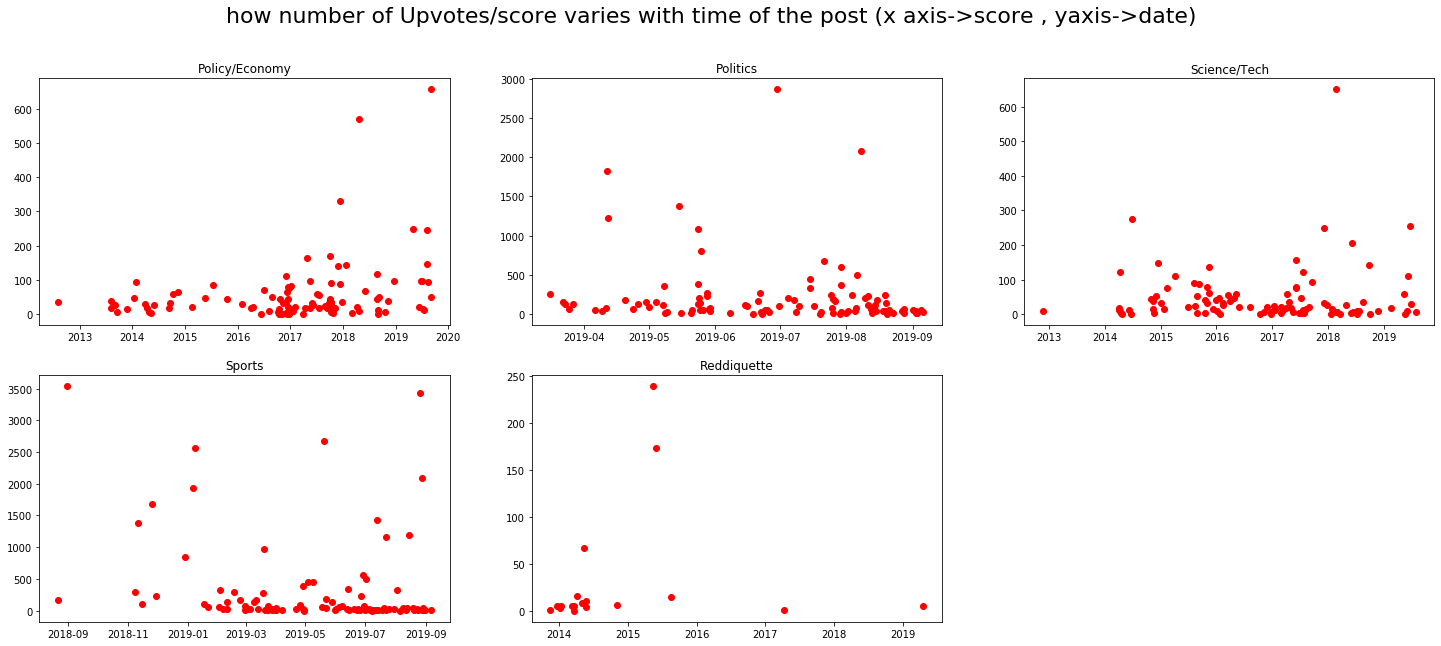

In [16]:
fig2=plt.figure(figsize=(25,10))
fig2.suptitle('how number of Upvotes/score varies with time of the post (x axis->score , yaxis->date) ', fontsize =22)
p7=fig2.add_subplot(231)
p7.set_title('Policy/Economy')
p7.plot_date(policy_date,policy_score,'ro')

p8=fig2.add_subplot(232)
p8.set_title('Politics')
p8.plot_date(pol_date,pol_score,'ro')

p9=fig2.add_subplot(233)
p9.set_title('Science/Tech')
p9.plot_date(sc_date,sc_score,'ro')

p10=fig2.add_subplot(234)
p10.set_title('Sports')
p10.plot_date(sports_date,sports_score,'ro')

p11=fig2.add_subplot(235)
p11.set_title('Reddiquette')
p11.plot_date(red_date,red_score,'ro')


fig2.savefig('score_vs_date2.png')

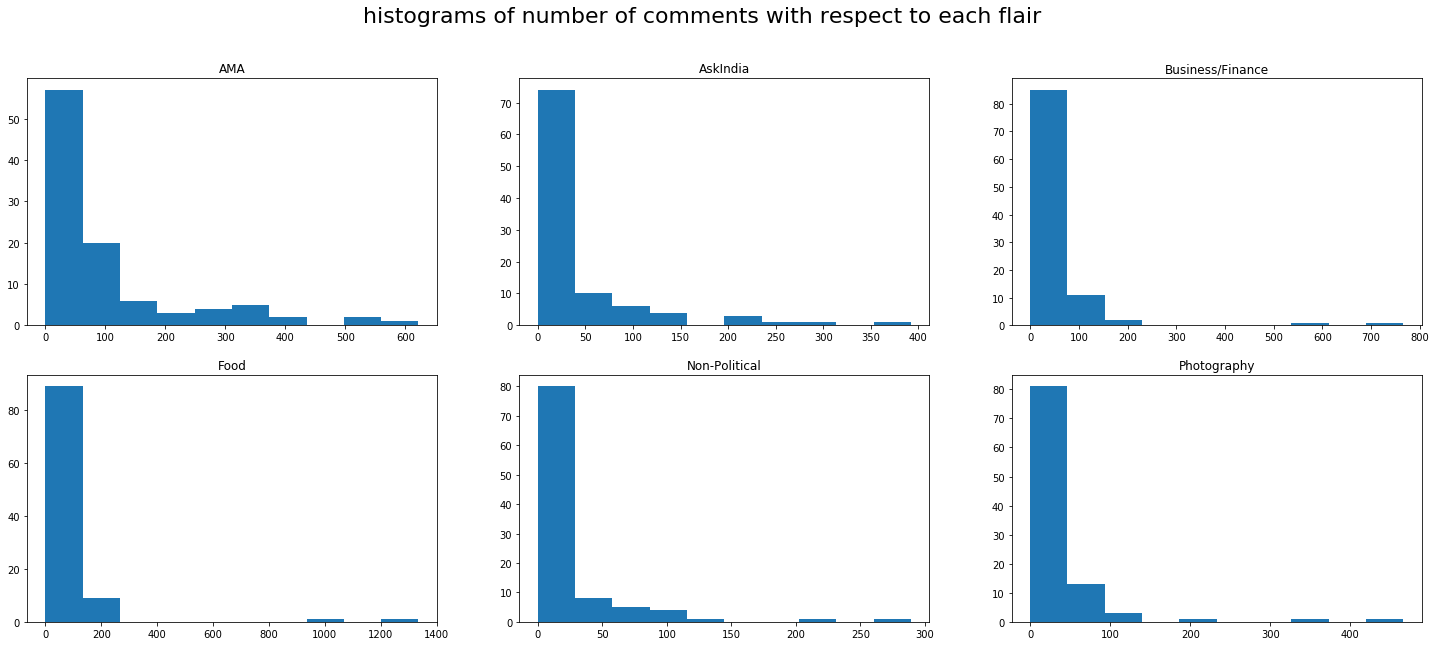

In [12]:
fig1=plt.figure(figsize=(25,10))
fig1.suptitle('histograms of number of comments with respect to each flair', fontsize =22)
p1=fig1.add_subplot(231)
p1.set_title('AMA')
p1.hist(ama_comms)

p2=fig1.add_subplot(232)
p2.set_title('AskIndia')
p2.hist(ask_comms)

p3=fig1.add_subplot(233)
p3.set_title('Business/Finance')
p3.hist(bus_comms)

p4=fig1.add_subplot(234)
p4.set_title('Food')
p4.hist(food_comms)

p5=fig1.add_subplot(235)
p5.set_title('Non-Political')
p5.hist(npol_comms)

p6=fig1.add_subplot(236)
p6.set_title('Photography')
p6.hist(photo_comms)

fig1.savefig('comm_hist1.png')

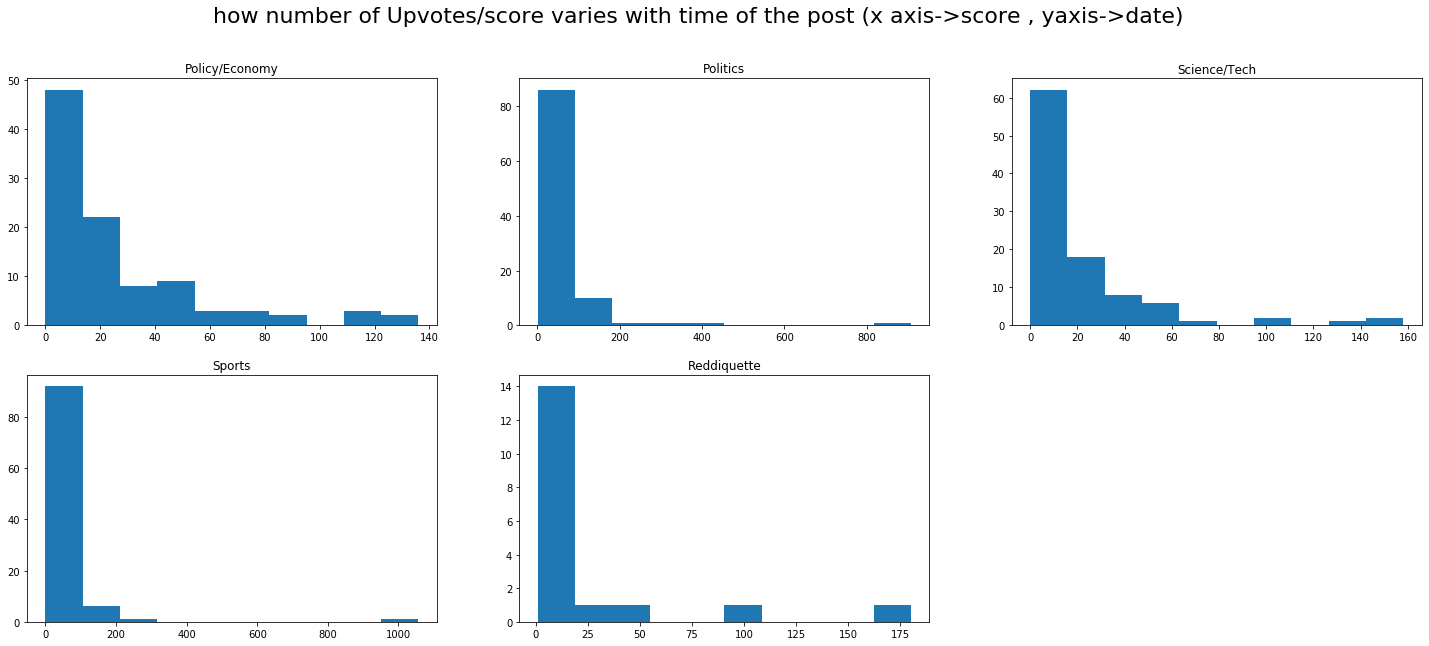

In [17]:
fig2=plt.figure(figsize=(25,10))
fig2.suptitle('how number of Upvotes/score varies with time of the post (x axis->score , yaxis->date) ', fontsize =22)
p7=fig2.add_subplot(231)
p7.set_title('Policy/Economy')
p7.hist(policy_comms)

p8=fig2.add_subplot(232)
p8.set_title('Politics')
p8.hist(pol_comms)

p9=fig2.add_subplot(233)
p9.set_title('Science/Tech')
p9.hist(sc_comms)

p10=fig2.add_subplot(234)
p10.set_title('Sports')
p10.hist(sports_comms)

p11=fig2.add_subplot(235)
p11.set_title('Reddiquette')
p11.hist(red_comms)


fig2.savefig('comm_hist2.png')